In [1]:
import pandas as pd
%pip install requests
import requests
# USGSから過去1か月の地震データを取得
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_month.csv"
response = requests.get(url)

# データをファイルに保存
with open('earthquakes.csv', 'wb') as file:
    file.write(response.content)

# データをDataFrameに読み込む
data = pd.read_csv('earthquakes.csv')

# データの最初の5行を表示
data.head(100)

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/Users/kanbesouichirou/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2025-11-12T05:25:38.785Z,61.007900,-150.771800,1.60,3.70,ml,NaN,NaN,NaN,0.79,...,2025-11-12T05:30:51.949Z,"10 km NNW of Point Possession, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
1,2025-11-12T05:17:34.037Z,62.363300,-150.903700,21.60,1.10,ml,NaN,NaN,NaN,0.42,...,2025-11-12T05:19:40.556Z,"16 km SSW of Petersville, Alaska",earthquake,NaN,0.30,NaN,NaN,automatic,ak,ak
2,2025-11-12T05:05:16.120Z,38.821835,-122.805168,2.37,0.52,md,6.0,95.0,0.015850,0.01,...,2025-11-12T05:22:19.369Z,"7 km NW of The Geysers, CA",earthquake,1.15,5.90,0.290000,8.0,automatic,nc,nc
3,2025-11-12T05:01:50.980Z,33.458833,-116.440667,2.40,0.76,ml,47.0,74.0,0.139700,0.19,...,2025-11-12T05:05:17.178Z,"23 km NNW of Borrego Springs, CA",earthquake,0.17,0.66,0.131000,25.0,automatic,ci,ci
4,2025-11-12T04:58:07.336Z,61.556300,-147.875700,20.60,1.80,ml,NaN,NaN,NaN,0.76,...,2025-11-12T05:10:11.125Z,"30 km SSW of Glacier View, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2025-11-11T18:04:11.760Z,60.056667,-153.049167,1.95,-0.85,ml,4.0,244.0,0.007273,0.09,...,2025-11-12T02:37:10.000Z,"66 km ENE of Pedro Bay, Alaska",earthquake,1.02,0.55,0.279665,4.0,reviewed,av,av
96,2025-11-11T18:00:10.360Z,38.821999,-122.805336,2.68,1.08,md,20.0,50.0,0.016050,0.02,...,2025-11-11T19:42:20.515Z,"7 km NW of The Geysers, CA",earthquake,0.25,0.47,0.060000,21.0,automatic,nc,nc
97,2025-11-11T17:59:07.012Z,64.692100,-149.112900,13.70,1.20,ml,NaN,NaN,NaN,0.90,...,2025-11-11T18:02:10.231Z,"9 km N of Four Mile Road, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak
98,2025-11-11T17:53:54.685Z,62.946000,-150.287400,11.90,1.60,ml,NaN,NaN,NaN,0.60,...,2025-11-11T17:56:03.543Z,"55 km NNE of Petersville, Alaska",earthquake,NaN,0.20,NaN,NaN,automatic,ak,ak


In [ ]:
# 国ごとの地震発生頻度ランキングと最大マグニチュードランキングを作成し、合計ポイントで順位付け
# 地震データには国情報が直接含まれていないため、place列から国名を抽出
#str.split(",").str[-1]でカンマ区切りの最後の部分を国名として抽出
data["country"] = data["place"].str.split(",").str[-1]
# 国ごとの地震発生頻度ランキング作成
ranking = data["country"].value_counts().head(10)

# 頻度ランキングのデータフレーム化
ranking_df = ranking.reset_index()
ranking_df.columns = ["country", "count"]
# ランキングを1から始める
ranking_df.index += 1

# 頻度に基づくポイント付与（頻度が高いほど高ポイント）
# 頻度ランキングの順位を逆にしてポイントを計算
ranking_df["point"] = ranking_df["count"].rank(method="min", ascending=False).astype(int)
# 高い頻度に高いポイントを与えるために、最大ポイントから引く
ranking_df["point"] = ranking_df["point"].max() - ranking_df["point"] + 1

# 最大マグニチュードランキング作成
# 国ごとの最大マグニチュード上位10か国を抽出
ranking_mag = data.sort_values("mag", ascending=False)[["mag", "country"]].head(10)
ranking_mag = ranking_mag.reset_index(drop=True)
# ランキングを1から始める
ranking_mag.index += 1
# マグニチュードに基づくポイント付与（マグニチュードが高いほど高ポイント）
# 高いマグニチュードに高いポイントを与えるために、ランキングの逆順でポイントを計算
ranking_mag["point"] = ranking_mag.index.map(lambda x: 11 - x)

# 頻度ポイントとマグニチュードポイントを合算して最終ランキングを作成
# 外部結合で両方のポイントを結合
merged = pd.merge(ranking_df, ranking_mag[["country", "point"]], on="country", how="outer", suffixes=("_freq", "_mag"))

# 空白を0に置換
merged = merged.fillna(0)

# 合計ポイントを計算
merged["total_point"] = merged["point_freq"] + merged["point_mag"]

# 各国の最大マグニチュードを取得
max_mag_per_country = data.groupby("country")["mag"].max().reset_index()
# 列名を変更
max_mag_per_country.columns = ["country", "max_mag"]

# 最終ランキングに最大マグニチュードを追加
final_ranking = pd.merge(merged, max_mag_per_country, on="country", how="left")
# データ型を整数に変換
final_ranking["total_point"] = final_ranking["total_point"].astype(int)
final_ranking["point_freq"] = final_ranking["point_freq"].astype(int)
final_ranking["point_mag"] = final_ranking["point_mag"].astype(int)

# 合計ポイントで並び替え
final_ranking = final_ranking.sort_values("total_point", ascending=False).reset_index(drop=True)

# ランキングを1から始める
final_ranking.index += 1
# 最終ランキングの上位10か国を表示
print("\n\n=== 合計ポイント  頻度 + 最大マグニチュード ランキング ===\n")
print(final_ranking[["country", "count", "max_mag", "point_freq", "point_mag", "total_point"]].head(10))





=== 合計ポイント  頻度 + 最大マグニチュード ランキング ===

         country   count  max_mag  point_freq  point_mag  total_point
1          Japan     0.0     6.80           0         10           10
2             CA  2356.0     3.83           9          0            9
3      Indonesia     0.0     6.50           0          9            9
4     Guadeloupe     0.0     6.50           0          8            8
5         Alaska  1943.0     5.40           8          0            8
6          Texas   573.0     3.20           7          0            7
7      Banda Sea     0.0     6.40           0          7            7
8          Japan     0.0     6.80           0          6            6
9     Washington   196.0     2.85           6          0            6
10   Afghanistan     0.0     6.30           0          5            5


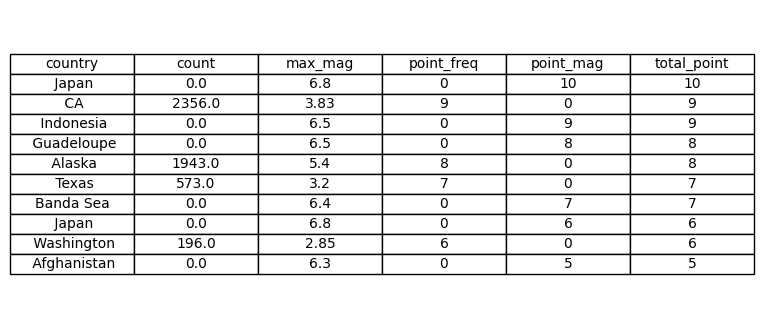

In [ ]:
import matplotlib.pyplot as plt

# 表示したいデータ（上位10件だけ）
table_data = final_ranking[["country", "count", "max_mag", "point_freq", "point_mag", "total_point"]].head(10)

# 図を作成
fig, ax = plt.subplots(figsize=(8, 4))
ax.axis('tight')
ax.axis('off')

# 表を作成
table = ax.table(cellText=table_data.values,
                 colLabels=table_data.columns,
                 cellLoc='center',
                 loc='center')

# 表のスタイルを整える
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# 画像として保存
plt.savefig("ranking_table.png", bbox_inches='tight', dpi=300)
plt.show()
